# Perceptron

We will now implement the perceptron classifier. We put ourselves in a setting where we have access to training examples $\boldsymbol{x}_i$ and each of them is associated with a target $y\in{-1,1}$. 

The perceptron classifier is a simple model that consists of a single neuron with a step activation function (also known as a [heavyside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)).

One can visualize it as follows:
![The Perceptron](./scripts/perceptron.png)

## Forward propagation
Given an n-dimensional input $x\in\mathbb{R}^n$ and taking into account the bias unit, one moves from the input to the output with two steps: 
- $s= \sum\limits_{i=0}^n w_ix_i$, where for consistency assume that the bias unit is $x_0$
- Application of the step function on s, that is
$a = \begin{cases} 
      1 & s\geq 0 \\
      -1 & s < 0 
\end{cases}
$

## Error propagation

Repeat until max_epochs or convergence is reached:

For each example in the training set:   
1. Forward pass to calculate $a$
3. If the example is misclassified: update each of the  weights $i$ with: $w_i^{(t+1)} = w_i^{(t)} + \eta*x_i*y_i$

## Why these update equations?
We are in the standard supervised classification setting, where one has $k$ examples $\vec{X}={\vec{x_1}, \ldots, \vec{x_k}}$, where $\vec{x_k} \in \mathbb{R}^n$. Each $\vec{x}_k \in \vec{X}$ is associated with a category $y_k \in \mathbb{Y}$, from a pre-defined set of categories. In the binary case $\mathbb{Y}=\{-1, +1\}$.  

We then, want to learn a vector $\vec{w} \in \mathbb{R}^{n+1}$, to perform the above described classification step. For the weight vector $\vec{w}$ we moved from $n$ to $n+1$ dimensions to account for the bias unit.
Using the perceptron algorithm we want to minimize the number of examples we misclassify, and essentially if the examples are linearly separable, misclassify nothing. Hence, one can define a simple loss function:

$\mathbb{L} = -\sum\limits_{k} y_k(\vec{w}\cdot\vec{x_k})$ 

In the online case, where one updates the weights for a single instance $k$, this becomes:
$\mathbb{L} = - y_k(\vec{w}\cdot\vec{x_k})$, where  L

To change the direction of $\vec{w}$ when we misclassify, we can:

$\nabla L = \frac{\partial L}{\partial w}= - y_k x_k$

We scale this update using the learning rate $\eta$ and we update by taking a step towards the negative of the gradient:

$w_k^{(t+1)} = w_k^{(t)} + \eta*x_k*y_k$



## The next steps
TBD: Your code goes here:
1. create a simple training set like the OR function
2. Code the perceptron classifier
3. Learn the Or function

You may want to ckeck: `np.array`, `numpy.random.rand`, `numpy.dot`,  `random.choice`

In [3]:
import random, numpy as np, matplotlib.pyplot as plt, time
%matplotlib inline

In [7]:
class Perceptron:
    def __init__(self, N, eta=0.2):
        self.W = np.zeros(N)
        self.eta = eta
        
    def step(self, value):
        if value >= 0:
            return 1
        else:
            return -1
        
    def forward_prop(self, x_input):
        return np.dot(self.W, x_input)
        
    def getScore(self, X, Y):
        cnt = 0
        for key, val in enumerate(X):
            if self.step( self.forward_prop(val) ) != Y[key]:
                cnt +=1 
        return 1 - cnt/float(len(X))
            
    
    def fit(self, X, Y, iterations=0):
        if not iterations:
            iterations = len(Y)
        for i in range(iterations):
            ind = np.random.randint(0, len(Y)) #Pick randomly a training example index
            prediction = self.step( self.forward_prop(X[ind]) ) 
            if prediction != Y[ind]:  # We need to update the weights, because we made an error
                error = Y[ind] - prediction
                self.W = self.W + self.eta * Y[ind] * X[ind]
        print self.getScore(X,Y)
                
    def predict(self, X):
        return self.step( self.forward_prop(X[ind]) )
        
    def visualize(self, X, Y):
        plt.plot(X[:, 1][Y==1], X[:, 2][Y==1], 'ro')
        plt.plot(X[:, 1][Y==-1], X[:, 2][Y==-1], 'bo')
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        x = np.linspace(-1,1)
        a, b = -self.W[1]/self.W[2], -self.W[0]/self.W[2]
        plt.plot(x, a*x+b, 'k-')
            
            
            
            
    
        

In [5]:
def generate_points(N, V):
    X = []
    for i in range(N):
        x1,x2 = [random.uniform(-1, 1) for i in range(2)]
        x = np.array([1,x1,x2])
        s = int(np.sign(V.T.dot(x)))
        X.append((x, s))
    return X
xA,yA,xB,yB = [random.uniform(-1, 1) for i in range(4)]
V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
X = generate_points(100, V)
Z, Y  = np.array([i[0] for i in X]), np.array([i[1] for i in X])
# Y[Y==-1] = 0

In [8]:
clf.W.shape

(3,)

Epoch: 0 0.95
Epoch: 1 0.95
Epoch: 2 0.95
Epoch: 3 1.0
Epoch: 4 1.0
Epoch: 5 1.0
Epoch: 6 1.0
Epoch: 7 1.0
Epoch: 8 1.0
Epoch: 9 1.0


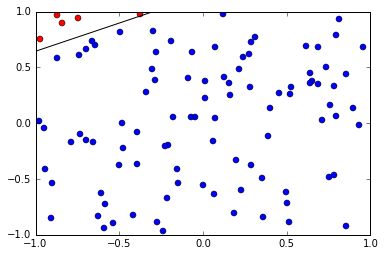

In [6]:

clf = Perceptron(3, 0.2)
for i in range(0, 10):
    print "Epoch: %d"%i,
    clf.fit(Z,Y)
#     fig = plt.figure(figsize=(5,5))
clf.visualize(Z, Y)


In [32]:
from random import choice
import numpy as np

unit_step = lambda x: 0 if x < 0 else 1

training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

w = np.random.rand(3)
errors = []
eta = 0.2 #Parameter
n = 20 #How many times one will sample the tranining set (stochastic updates)

for i in xrange(n):
    x, expected = choice(training_data)
    result = np.dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.017744911993 -> 0
[0 1]: 0.204878604442 -> 1
[1 0]: 0.766693814327 -> 1
[1 1]: 0.989317330763 -> 1


In [78]:
def generate_points(N, V):
    X = []
    for i in range(N):
        x1,x2 = [random.uniform(-1, 1) for i in range(2)]
        x = np.array([1,x1,x2])
        s = int(np.sign(V.T.dot(x)))
        X.append((x, s))
    return X
xA,yA,xB,yB = [random.uniform(-1, 1) for i in range(4)]
V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
X = generate_points(20, V)

In [80]:
Z= np.array(Z)
Y = np.array(Y)
Z.shape

(20, 3)

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

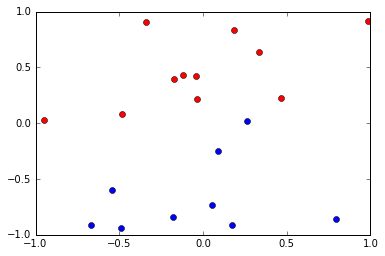

In [82]:
plt.plot(Z[:, 1][Y==1], Z[:, 2][Y==1], 'ro')
plt.plot(Z[:, 1][Y==-1], Z[:, 2][Y==-1], 'bo')